In [49]:
import numpy as np
from scipy.special import hermite
from scipy.integrate import simpson
from math import lgamma
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd
import os

color_palette = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

save_plots = True

In [2]:
def eigenfunc_thr(x, k=0, omega=1.0):
    H_k = hermite(k)
    return (1.0/np.sqrt(2.0**k)) * np.exp(-0.5*lgamma(k+1)) * (omega/np.pi)**0.25 * np.exp(-0.5*omega*x**2) * H_k(np.sqrt(omega)*x)

In [3]:
os.system("bash compile.sh")

0

### Plot of eigenfunctions

In [4]:
os.system('./a.out 1001 200 input/omega.dat results/out.dat')

0

In [5]:
with open("results/out.dat") as file:
    data = file.readlines()

In [50]:
omega = float(open("input/omega.dat").readlines()[0].strip("\n").strip(" "))
print(f"omega = {omega}")

omega = 1.0


In [7]:
N_, k_max = np.array(data[0].strip("\n").split(" "), dtype=int)
print(f"N={N_}, k_max={k_max}")

xgrid = data[2].strip("\n").split(" ")
xgrid = np.array([x for x in xgrid if len(x)>0], dtype=float)
idx_zero = np.argmin(np.abs(xgrid))


eigvals = np.array([])
eigvects = np.array([[np.nan]*N_])

for eig_idx in range(k_max):
    eigvals = np.concatenate((eigvals, [float(data[4+eig_idx*3].strip(" ").strip("\n"))]))

    ev_ = data[4+eig_idx*3+1].strip(" ").strip("\n").split(" ")
    eigvects = np.concatenate((eigvects, np.array([[x for x in ev_ if len(x)>0]]).astype(float)), axis=0)

eigvects = eigvects[1:]

N=1001, k_max=200


In [8]:
evplot_idx = [0,10, 25, 100]

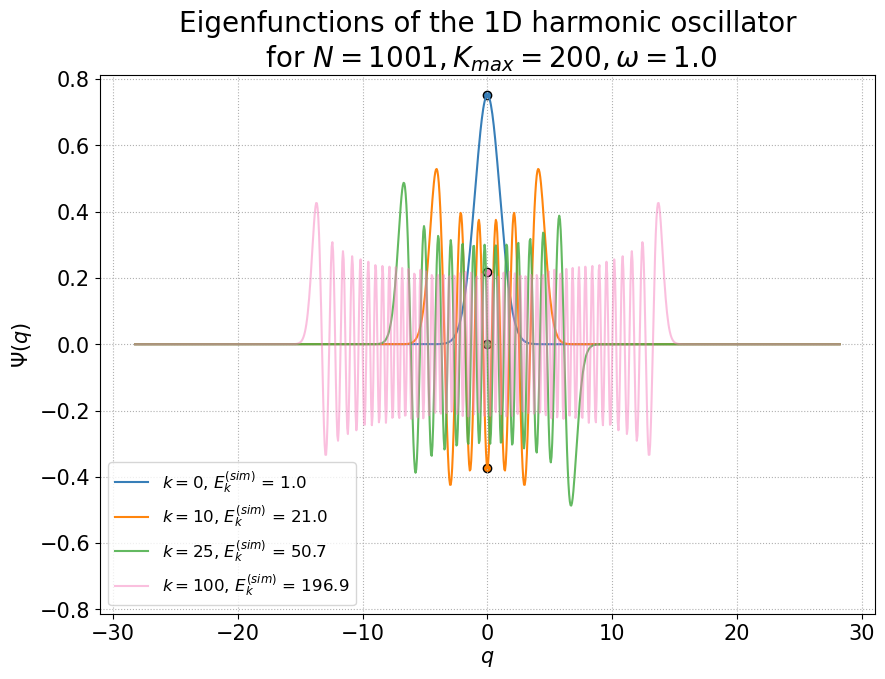

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# plot all the desider plots
for idx, vals_ in enumerate(evplot_idx):
    ax.plot(xgrid, eigvects[vals_], "-", label=f"$k={vals_}$, $E_k^{{(sim)}}$ = {round(eigvals[vals_],1)}",
            alpha=1-0.005*vals_, color=color_palette[idx])
    ax.scatter(xgrid[idx_zero], eigvects[vals_,idx_zero], color=color_palette[idx], edgecolors='black')
    

ax.set_title(f"Eigenfunctions of the 1D harmonic oscillator\n for $N={N_}, K_{{max}}={k_max}, \omega={omega:.1f}$", fontsize=20)
ax.set_xlabel(r"$q$", fontsize=15)
ax.set_ylabel(r"$\Psi(q)$", fontsize=15)
ax.set_ylim(-np.max(np.abs(ax.get_ylim())), np.max(np.abs(ax.get_ylim())))
ax.tick_params(axis="both", which="major", labelsize=15)
ax.grid(True, which="both", linestyle=":")
ax.legend(fontsize=12)

if save_plots:
    fig.savefig("results/wavefunctions.png", dpi=400, format='png')

### Plot of eigenvalues relative error

In [10]:
N_list = [501, 1001 , 2001, 4001, 8001]

N=501, k_max=100
N=1001, k_max=100
N=2001, k_max=100
N=4001, k_max=100
N=8001, k_max=100


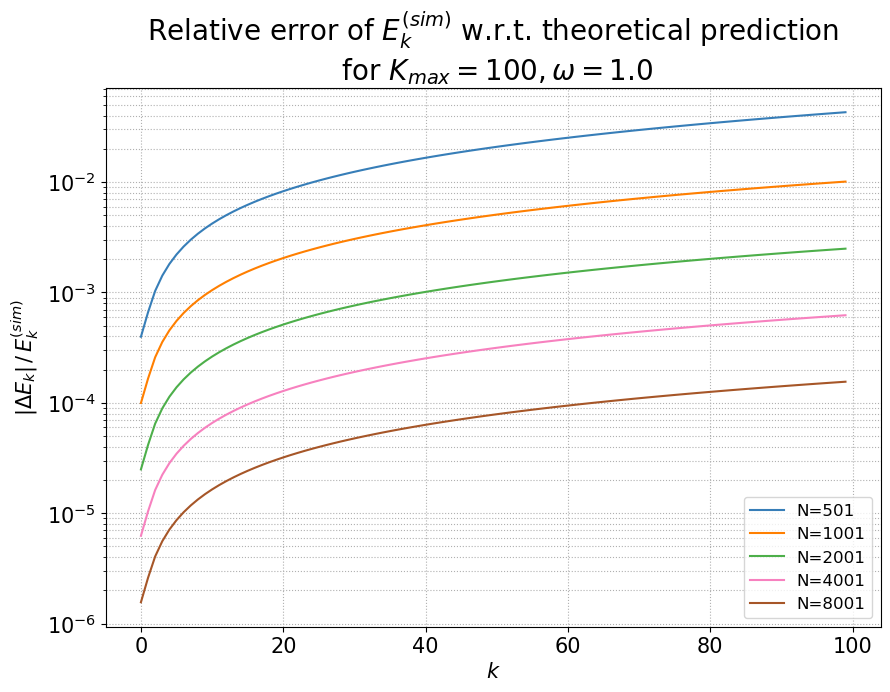

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# plot all the desider plots
for ii, N_v in enumerate(N_list):
    os.system(f'./a.out {N_v} 100 input/omega.dat results/out.dat')

    with open("results/out.dat") as file:
        data = file.readlines()

    N_, k_max = np.array(data[0].strip("\n").split(" "), dtype=int)
    print(f"N={N_}, k_max={k_max}")

    xgrid = data[2].strip("\n").split(" ")
    xgrid = np.array([x for x in xgrid if len(x)>0], dtype=float)
    idx_zero = np.argmin(np.abs(xgrid))


    eigvals = np.array([])
    eigvects = np.array([[np.nan]*N_])

    # retrieve eigenvalues and eigenvectors from output file
    for eig_idx in range(k_max):
        eigvals = np.concatenate((eigvals, [float(data[4+eig_idx*3].strip(" ").strip("\n"))]))

        ev_ = data[4+eig_idx*3+1].strip(" ").strip("\n").split(" ")
        eigvects = np.concatenate((eigvects, np.array([[x for x in ev_ if len(x)>0]]).astype(float)), axis=0)

    eigvects = eigvects[1:]

    # plot absolute error of eigenvalues
    ax.plot(range(k_max), np.abs(eigvals-2*omega*(np.array(range(0,k_max))+0.5))/eigvals, label=f"N={N_}", color=color_palette[ii])

    

    

ax.set_title(f"Relative error of $E_k^{{(sim)}}$ w.r.t. theoretical prediction\n for $K_{{max}}={k_max}, \omega={omega:.1f}$",
             fontsize=20)
ax.set_xlabel("$k$", fontsize=15)
ax.set_ylabel(r"$|\Delta E_k|\, /\, E_k^{(sim)}$", fontsize=15)
ax.set_yscale('log')
ax.tick_params(axis="both", which="major", labelsize=15)
ax.grid(True, which="both", linestyle=":")
ax.legend(fontsize=12)

if save_plots:
    fig.savefig("results/lambda_relative_errors.png", dpi=400, format='png')

### Parity plots

In [12]:
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# # plot all the desider plots
# for ii, N_v in enumerate(N_list):
#     os.system(f'./a.out {N_v} 100 input/omega.dat results/out.dat')

#     with open("results/out.dat") as file:
#         data = file.readlines()

#     N, k = np.array(data[0].strip("\n").split(" "), dtype=int)
#     print(f"N={N}, k={k}")

#     xgrid = data[2].strip("\n").split(" ")
#     xgrid = np.array([x for x in xgrid if len(x)>0], dtype=float)
#     idx_zero = np.argmin(np.abs(xgrid))


#     eigvals = np.array([])
#     eigvects = np.array([[np.nan]*N])

#     # retrieve eigenvalues and eigenvectors from output file
#     for eig_idx in range(k):
#         eigvals = np.concatenate((eigvals, [float(data[4+eig_idx*3].strip(" ").strip("\n"))]))

#         ev_ = data[4+eig_idx*3+1].strip(" ").strip("\n").split(" ")
#         eigvects = np.concatenate((eigvects, np.array([[x for x in ev_ if len(x)>0]]).astype(float)), axis=0)

#     eigvects = eigvects[1:]


# # plot parities
# ax.scatter(range(0,k,2), eigvects[0::2,idx_zero], color='k')
# ax.plot(range(0,k,2), [eigenfunc_thr(0, kk, omega) for kk in range(0,k,2)], color='k', ls="dashed")

# ax.set_title("", fontsize=20)
# ax.set_xlabel("$k$", fontsize=15)
# ax.set_ylabel(r"$\Psi_k(0)$", fontsize=15)
# ax.tick_params(axis="both", which="major", labelsize=15)
# ax.grid(True, which="both", linestyle=":")
# ax.legend(fontsize=12)

# #fig.savefig("results/lambda_relative_errors.png", dpi=400, format='png')

### Stability checks

In [13]:
N_list = [201, 401, 801, 1601, 3201, 6401, 12801, 25601, 51201, 102401, 204801]
k_list = [0,1,5,10,20]

N=201, k=100
N=401, k=100
N=801, k=100
N=1601, k=100
N=3201, k=100
N=6401, k=100
N=12801, k=100
N=25601, k=100
N=51201, k=100
N=102401, k=100
N=204801, k=100


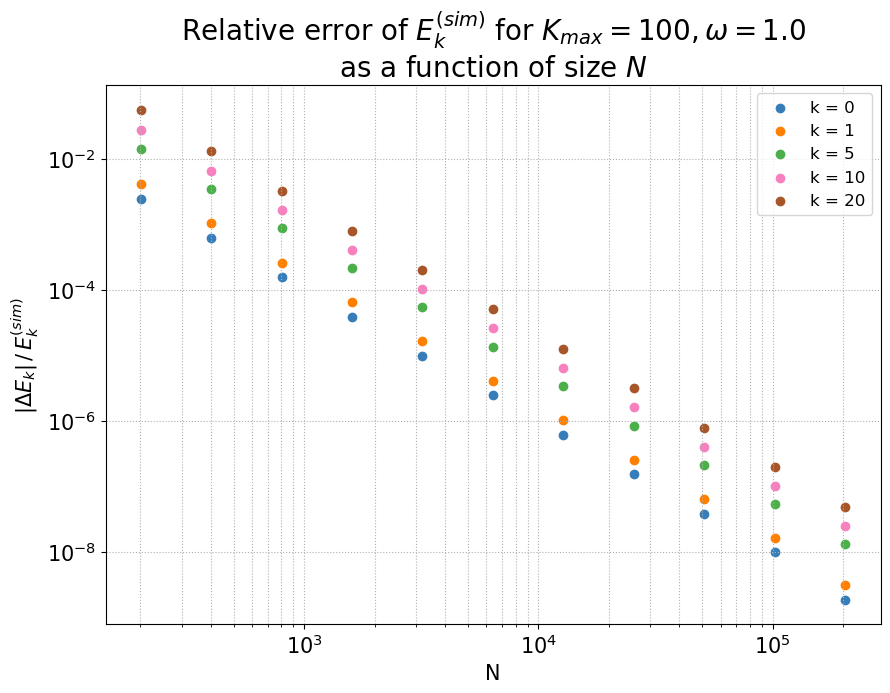

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))
omega = 1.0
eigvals = np.array([np.nan]*len(k_list)).reshape(1,-1)

# plot all the desider plots
for ii, N_v in enumerate(N_list):
    os.system(f'./a.out {N_v} 100 input/omega.dat results/out.dat')

    with open("results/out.dat") as file:
        data = file.readlines()

    N_, k_max = np.array(data[0].strip("\n").split(" "), dtype=int)
    print(f"N={N_}, k={k_max}")

    # retrieve eigenvalues and eigenvectors from output file
    evs_ = np.array([float(data[4+k_*3].strip("\n").strip(" ")) for k_ in k_list]).reshape(1,-1)
    eigvals = np.concatenate([eigvals, evs_], axis=0)

eigvals = eigvals[1:]


# plot N scaling
for ik, k_ in enumerate(k_list):
    ax.scatter(N_list, np.abs(eigvals[:,ik] - 2*omega*(k_+0.5))/eigvals[:,ik],
               label=f"k = {k_}", c=color_palette[ik])
    

ax.set_title((f"Relative error of $E_k^{{(sim)}}$ for $K_{{max}}=100, \omega={omega:.1f}$\n"
             "as a function of size $N$"),
             fontsize=20)
ax.set_xlabel("N", fontsize=15)
ax.set_ylabel(r"$|\Delta E_k|\, /\, E_k^{(sim)}$", fontsize=15)
ax.set_xscale('log')
ax.set_yscale('log')
ax.tick_params(axis="both", which="major", labelsize=15)
ax.grid(True, which="both", linestyle=":")
ax.legend(fontsize=12)

if save_plots:
    fig.savefig("results/N_scaling.png", dpi=400, format='png')

### Discretization accuracy

,k_max,omega,L,delta,frac
0,1,1.0,4.000000,3.958004,0.989501
1,2,1.0,5.656854,5.604251,0.990701
2,4,1.0,8.000000,7.882412,0.985301
3,8,1.0,11.313708,10.703961,0.946105
4,16,1.0,16.000000,13.845015,0.865313
5,32,1.0,22.627417,18.308275,0.809119
6,64,1.0,32.000000,24.714329,0.772323
7,128,1.0,45.254834,33.883431,0.748725
8,256,1.0,64.000000,46.932907,0.733327
9,512,1.0,90.509668,65.431947,0.722928


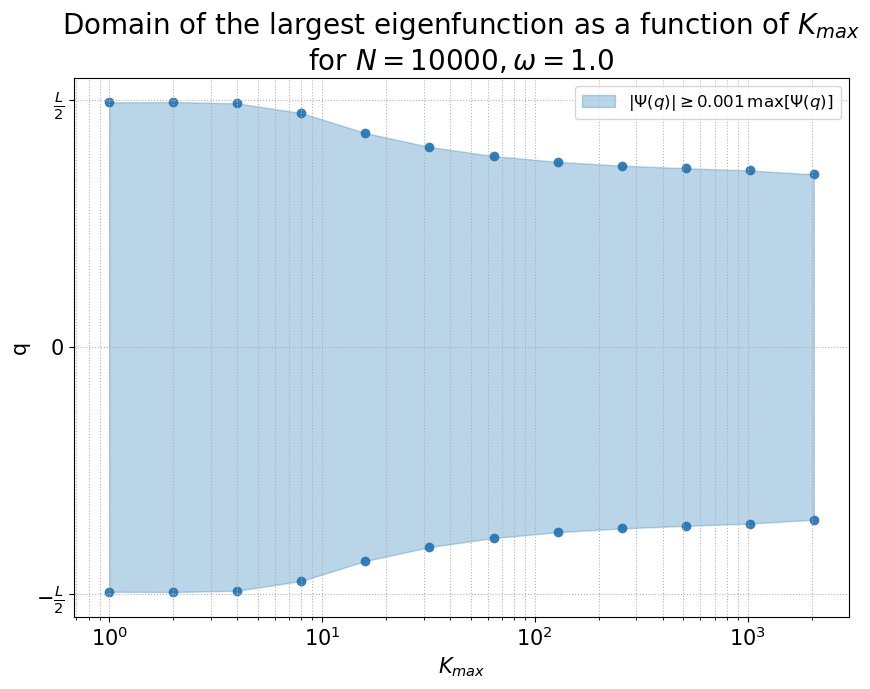

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# pd.DataFrame({'k_max':[], 'omega':[], 'L':[], 'delta':[]}).to_csv("frac_L.csv", header=True, index=False, mode='w')

# # plot all the desider plots
# for k_max_ in k_max_list:
#     for omega_ in omega_list:


#         os.system(f"echo {omega_} > input/omega.dat")
#         os.system("cat input/omega.dat")
#         os.system(f'./a.out 10000 {k_max_} input/omega.dat results/out.dat')
    
#         with open("results/out.dat") as file:
#             data = file.readlines()

#         N_, k_max_ = np.array(data[0].strip("\n").split(" "), dtype=int)
#         print(f"N={N_}, k={k_max_}")

#         # take grid and selected eigenvector
#         xgrid = data[2].strip("\n").split(" ")
#         xgrid = np.array([x for x in xgrid if len(x)>0], dtype=float)
#         eigvect = np.array([x for x in data[4+(k_max_-1)*3+1].strip(" ").strip("\n").split(" ") if len(x)>0], dtype=float)


#         # select window
#         frac = 0.01
#         thresh = np.max(np.abs(eigvect)) * frac
#         delta = xgrid[-np.argmax(np.abs(eigvect[::-1])>thresh)] - xgrid[np.argmax(np.abs(eigvect)>thresh)]

#         # print results on file
#         windows_sizes = pd.DataFrame({'k_max':[k_max_], 'omega':[omega_], 'L':[4*np.sqrt(k_max_/omega_)], 'delta':[delta]})
#         windows_sizes["frac"] = windows_sizes["delta"]/windows_sizes["L"]
#         windows_sizes.to_csv("frac_L.csv", header=False, index=False, mode='a')


omega=1.0
L_frac = pd.read_csv("results/frac_L.csv")
display(L_frac)

# plot N scaling
for idx in L_frac.index:
    ax.scatter([L_frac.loc[idx,'k_max'], L_frac.loc[idx,'k_max']],
                [L_frac.loc[idx,'frac']*(-0.5),L_frac.loc[idx,'frac']*(0.5)], c=color_palette[0])
    

ax.set_title((f"Domain of the largest eigenfunction as a function of $K_{{max}}$ \nfor $N=10000, \omega={omega:.1f}$"),
             fontsize=20)
ax.set_xlabel("$K_{{max}}$", fontsize=15)
ax.set_ylabel("q", fontsize=15)
ax.set_xscale('log')
ax.set_yticks([-0.5,0,0.5])
ax.set_yticklabels([r"$-\frac{L}{2}$", 0, r"$\frac{L}{2}$"])
ax.tick_params(axis="both", which="major", labelsize=15)
ax.grid(True, which="both", linestyle=":")
ax.fill_between(L_frac['k_max'], -0.5*L_frac['frac'], 0.5*L_frac['frac'],
                color='C0', alpha=0.3, interpolate=False, label=r"$|\Psi(q)| \geq 0.001\, \max[\Psi(q)]$")
ax.legend(fontsize=12)

if save_plots:
    fig.savefig("results/discretization.png", dpi=400, format='png')

### Efficiency

In [51]:
times = pd.read_csv("results/timescalings.csv", header=None, names=["N", "K_max", "omega", "time"])
times["K_over_N"] = times["K_max"]/times["N"]
times

,N,K_max,omega,time,K_over_N
0,1000,10,1.0,0.027909,0.01
1,1000,20,1.0,0.048185,0.02
2,1000,50,1.0,0.114433,0.05
3,1000,100,1.0,0.235871,0.10
4,1000,200,1.0,0.523914,0.20
5,2000,20,1.0,0.096901,0.01
6,2000,40,1.0,0.179355,0.02
7,2000,100,1.0,0.532435,0.05
8,2000,200,1.0,1.113075,0.10
9,2000,400,1.0,2.633208,0.20


In [52]:
list_N = np.unique(times["N"])
list_K_over_N = np.unique(times["K_over_N"])

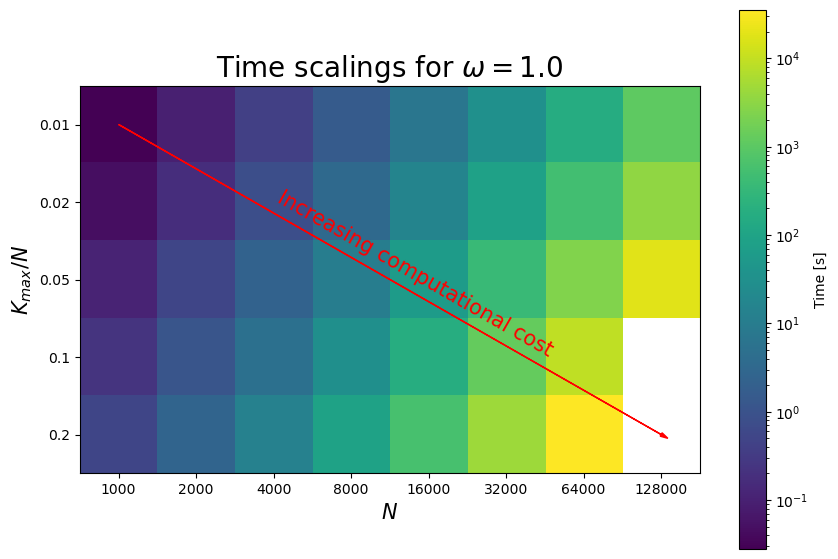

In [54]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

im = ax.imshow(times.sort_values(by=['K_over_N','N'])['time'].values.reshape(len(np.unique(times['K_over_N'])),-1),
            norm=colors.LogNorm())
fig.colorbar(im, ax=ax, label="Time [s]")

ax.set_xticks(np.arange(len(list_N)), labels=list_N)
ax.set_yticks(np.arange(len(list_K_over_N)), labels=list_K_over_N)
ax.set_title((f"Time scalings for $\omega={omega:.1f}$"),
             fontsize=20)
ax.set_xlabel("$N$", fontsize=15)
ax.set_ylabel("$K_{{max}}/N$", fontsize=15)
ax.arrow(0, 0, 7, 4, head_width=0.05, head_length=0.1, color='r')
ax.text(2,3,s="Increasing computational cost", rotation=-np.rad2deg(np.arctan2(4,7)), c='r', fontsize=15)


if save_plots:
    fig.savefig("results/timescaling.png", dpi=400, format='png')